# Neural Nets - Binary Classification - Fake vs Real Dollars

Rob Rappa
7/7/19

#Source - DataCamp - Deep Learning with Keras

In [31]:
#########################
# IMPORT
#########################

import math
import numpy as np
from numpy import genfromtxt
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

### Read Data

In [19]:
#Read banknotes data
#Downloaded from US Irvine

#Read into pandas
banknotes = pd.read_csv('data_banknote_authentication.txt', sep=",", header=None)

#Add column names
banknotes.columns = ["variance", "skewness", "curtosis","entropy", "class"]

In [20]:
banknotes[:5]

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Exploratory Data Analysis

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


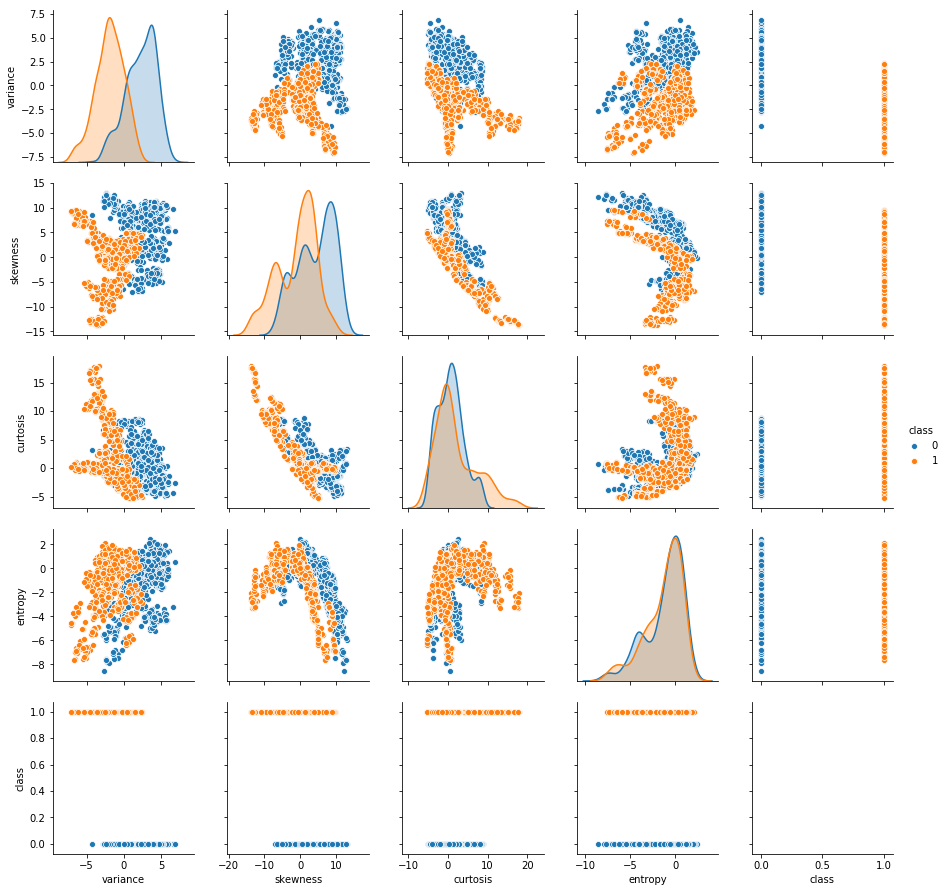

Dataset stats: 
           variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observations per class: 
 0    762
1    610
Name: class, dtype: int64


In [22]:
# Use pairplot and set the hue to be our class
sns.pairplot(banknotes, hue='class') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations of each class
print('Observations per class: \n', banknotes['class'].value_counts())

In [30]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(banknotes[["variance", "skewness", "curtosis","entropy"]]\
                                                    , banknotes["class"], test_size=0.33, random_state=42)

### Build Architecture

In [23]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Include Keras Callbacks

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', patience=10)


# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_binaryclass_model.hdf5', save_best_only=True)

### Fit model

In [34]:
# Train your model for 200 epochs
history = model.fit(X_train,y_train, \
                    validation_data = (X_test, y_test), \
                    epochs=200, \
                   callbacks=[monitor_val_acc,modelCheckpoint])



Train on 919 samples, validate on 453 samples
Epoch 1/200
919/919 [==============================] - 0s 140us/step - loss: 0.1402 - acc: 0.9510 - val_loss: 0.1534 - val_acc: 0.9492
Epoch 2/200
919/919 [==============================] - 0s 51us/step - loss: 0.1370 - acc: 0.9510 - val_loss: 0.1504 - val_acc: 0.9514
Epoch 3/200
919/919 [==============================] - 0s 99us/step - loss: 0.1340 - acc: 0.9510 - val_loss: 0.1475 - val_acc: 0.9536
Epoch 4/200
919/919 [==============================] - 0s 76us/step - loss: 0.1312 - acc: 0.9521 - val_loss: 0.1448 - val_acc: 0.9536
Epoch 5/200
919/919 [==============================] - 0s 82us/step - loss: 0.1286 - acc: 0.9543 - val_loss: 0.1423 - val_acc: 0.9558
Epoch 6/200
919/919 [==============================] - 0s 86us/step - loss: 0.1262 - acc: 0.9543 - val_loss: 0.1399 - val_acc: 0.9558
Epoch 7/200
919/919 [==============================] - 0s 91us/step - loss: 0.1238 - acc: 0.9554 - val_loss: 0.1376 - val_acc: 0.9581
Epoch 8/200
919

In [35]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:',accuracy)

453/453 [==============================] - 0s 19us/step
Accuracy: 0.9757174392935982


### Review Training and Validation Loss and Accuracy

In [36]:
#Function for plotting loss over epochs
#Pulled from DataCamp class: print(inspect.getsource(plot_loss))

def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

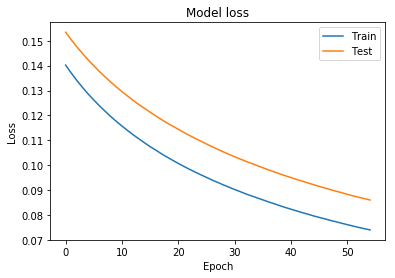

In [37]:
# Plot train vs test loss during training
plot_loss(history.history['loss'], history.history['val_loss'])

In [42]:
#Function for plotting accuracy over epochs
#Pulled from DataCamp class: print(inspect.getsource(plot_accuracy))

def plot_accuracy(acc,val_acc):
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

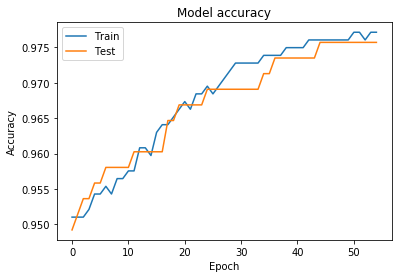

In [43]:
# Plot train vs test accuracy during training
plot_accuracy(history.history['acc'], history.history['val_acc'])

### Evaluate Different Activation Functions

In [45]:
#No need to do this
#We go from input directly to output, and the output requires a sigmoid